In [6]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('LoanData.csv',low_memory=False)

## Plot age distribution of lenders

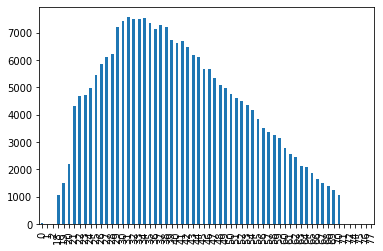

In [11]:
values = df['Age'].value_counts()
values.sort_values().sort_index().plot(kind="bar")
age_groups = pd.cut(df['Age'], bins=[19, 40, 65, np.inf])

In [12]:
df.head()

,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,AppliedAmount,LanguageCode,Age,Gender,Country,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,17,4,4.0,2125.0,1,53,1.0,EE,60,62.05,2,4.0,2.0,0,6.0,MoreThan5Years,15To25Years,1.0,1.0,0.0,301.0,0.0,53.0,0.0,0.0,0.0,354.0,8,485.09,6,26.29,10.92,12,False,1.0,500.0,590.95,0.0,0.0
2,11,5,1.0,3000.0,1,50,1.0,EE,60,84.75,3,5.0,2.0,0,5.0,MoreThan5Years,MoreThan25Years,7.0,1.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,4,736.45,0,30.58,78.80,17,False,1.0,1800.0,445.26,3000.0,1.0
3,22,3,4.0,10630.0,1,44,0.0,EE,60,268.57,3,4.0,4.0,1,5.0,UpTo3Years,MoreThan25Years,8.0,8.0,600.0,0.0,0.0,0.0,0.0,0.0,600.0,1200.0,7,905.00,3,26.71,349.43,20,True,0.0,0.0,0.00,0.0,0.0
4,15,3,3.0,1500.0,6,42,0.0,ES,60,63.53,2,2.0,1.0,0,3.0,UpTo5Years,5To10Years,1.0,2.0,863.0,0.0,0.0,0.0,0.0,0.0,0.0,863.0,1,350.00,0,7.36,449.47,1,True,0.0,0.0,0.00,1500.0,1.0
5,20,3,4.0,1595.0,6,34,1.0,ES,48,101.19,7,4.0,4.0,2,6.0,UpTo1Year,5To10Years,1.0,3.0,0.0,697.0,0.0,0.0,0.0,0.0,0.0,697.0,5,940.00,2,36.04,95.81,1,True,0.0,0.0,0.00,0.0,0.0


# Home Ownership

In [13]:
home_ownership_counts = df['HomeOwnershipType'].value_counts()
print(home_ownership_counts)

 1.0     55336
 3.0     39521
 2.0     24051
 8.0     16109
 10.0    10930
 4.0      4448
 7.0      3098
 6.0      1549
 5.0      1478
 9.0       693
 0.0        46
-1.0         3
Name: HomeOwnershipType, dtype: int64


### !!! -1 should not exist (not listed as value) -> remove lines from dataset

In [14]:
len_before = len(df.index)
df = df.loc[df['HomeOwnershipType'] != -1.0]
print(len_before-len(df.index), 'rows deleted.\n\n')

3 rows deleted.




In [15]:
home_ownership_counts = df['HomeOwnershipType'].value_counts().sort_index()
print(home_ownership_counts)

0.0        46
1.0     55336
2.0     24051
3.0     39521
4.0      4448
5.0      1478
6.0      1549
7.0      3098
8.0     16109
9.0       693
10.0    10930
Name: HomeOwnershipType, dtype: int64


<AxesSubplot:>

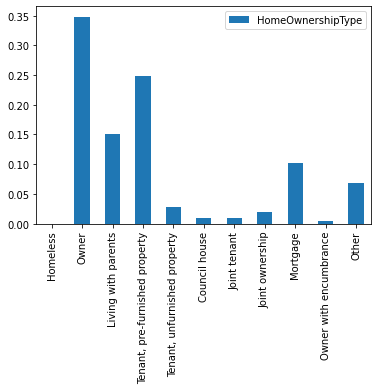

In [16]:
home_ownership_dict = {
    0.0: "Homeless", 
    1.0: "Owner", 
    2.0: "Living with parents", 
    3.0: "Tenant, pre-furnished property", 
    4.0: "Tenant, unfurnished property", 
    5.0: "Council house", 
    6.0: "Joint tenant", 
    7.0: "Joint ownership", 
    8.0: "Mortgage", 
    9.0: "Owner with encumbrance", 
    10.0: "Other"
}

home_ownership_list = pd.Index([
    "Homeless", 
    "Owner", 
    "Living with parents", 
    "Tenant, pre-furnished property", 
    "Tenant, unfurnished property", 
    "Council house", 
    "Joint tenant", 
    "Joint ownership", 
    "Mortgage", 
    "Owner with encumbrance", 
    "Other"
])

num_rows = len(df.index)
frame = home_ownership_counts.to_frame().set_index(home_ownership_list)
frame['HomeOwnershipType'] = frame['HomeOwnershipType'] / num_rows
frame.plot(kind='bar')
# sns.scatterplot(data=values.sort_values().to_frame());

In [18]:
# replace numbers 0-10 in HomeOwnershipType with actual values
df['HomeOwnershipType'] = df['HomeOwnershipType'].replace(home_ownership_dict)
print(df.head())
# group data by target
grouped = df.groupby(['TARGET']).HomeOwnershipType.value_counts().sort_index()
print(grouped)

# plot grouped data
grouped.unstack(0).plot.bar()

   ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                     17                         4               4.0   
2                     11                         5               1.0   
3                     22                         3               4.0   
4                     15                         3               3.0   
5                     20                         3               4.0   

   AppliedAmount  LanguageCode  Age  Gender Country  LoanDuration  \
0         2125.0             1   53     1.0      EE            60   
2         3000.0             1   50     1.0      EE            60   
3        10630.0             1   44     0.0      EE            60   
4         1500.0             6   42     0.0      ES            60   
5         1595.0             6   34     1.0      ES            48   

   MonthlyPayment  UseOfLoan  Education  MaritalStatus NrOfDependants  \
0           62.05          2        4.0            2.0              0   
2     

KeyError: 'TARGET'

In [ ]:
print(df.shape)
print(df['TARGET'].head())

In [ ]:
print("0: repaid on time")
print("1: default")


class_dist = df['TARGET'].value_counts()

plt.figure(figsize=(12,3))
plt.title('Class Distribution')
plt.barh(class_dist.index, class_dist.values)
plt.yticks([0, 1])

for i, value in enumerate(class_dist.values):
    plt.text(value-2000, i, str(value), fontsize=12, color='white',
             horizontalalignment='right', verticalalignment='center')

plt.show()


In [ ]:

plt.figure(figsize=(24,20))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.show()